<a href="https://www.kaggle.com/code/lalit7881/gold-medal-prediction-92-accuracy?scriptVersionId=300655454" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/ashyou09/olympics-athletes-dataset-18962024/olympics_athletes_dataset.csv


 ## 🏅 Title:
Olympic Athletes Historical Dataset (1896–2024)

## 📄 Description (TXT):
This comprehensive dataset compiles detailed records of Olympic athletes and their performances from the first modern Olympic Games in 1896 through the Paris 2024 Olympics. It includes biographical data for individual athletes (such as name, age, sex, height, and weight), their event participation, results, medal information, team/NOC codes, host city and year, and sport/event classifications. The dataset covers both Summer and Winter Olympic Games, providing a complete historical archive of athlete participation and performance. Useful for sports analytics, historical research, visualization, and machine learning, this dataset enables analysis of trends in athlete demographics, country performances, medal counts, and Olympic event evolution over more than 128 years.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/datasets/ashyou09/olympics-athletes-dataset-18962024/olympics_athletes_dataset.csv")

In [3]:
df.head()

,athlete_id,athlete_name,gender,age,date_of_birth,nationality,country_name,sport,event,games_type,...,bronze_medals,country_total_gold,country_total_medals,country_first_participation,country_best_rank,is_record_holder,coach_name,height_cm,weight_kg,notes
0,ATH-00001,Svetlana Jung,Female,19,2005-12-04,AUT,Austria,Rowing,Four W,Summer,...,1,59,196,1896,18,No,Wei Ping,175.9,73.7,-
1,ATH-00002,Mary Yamamoto,Female,37,1987-07-11,MEX,Mexico,Ski Jumping,Normal Hill Team,Winter,...,5,14,72,1924,35,No,Yury Zakharevich,165.4,68.3,Olympic Debut
2,ATH-00003,Oksana Volkov,Female,37,1987-02-02,BUL,Bulgaria,Figure Skating,Women's Singles,Winter,...,1,54,224,1896,15,No,Alberto Salazar,164.2,67.2,-
3,ATH-00004,Rui Suzuki,Male,32,1992-12-08,HKG,Hong Kong,Triathlon,Men's Triathlon,Summer,...,0,3,9,1952,60,Olympic Record,Marcus O'Sullivan,190.0,76.0,First from country
4,ATH-00005,Natalya Grigoryan,Female,27,1997-11-15,SWE,Sweden,Triathlon,Men's Triathlon,Summer,...,0,200,648,1896,4,No,John Smith,175.8,60.9,Season Best


In [4]:
df.tail()

,athlete_id,athlete_name,gender,age,date_of_birth,nationality,country_name,sport,event,games_type,...,bronze_medals,country_total_gold,country_total_medals,country_first_participation,country_best_rank,is_record_holder,coach_name,height_cm,weight_kg,notes
8495,ATH-08496,Dorothy Meyer,Female,29,1995-10-12,KEN,Kenya,Ice Hockey,Women's Ice Hockey,Winter,...,2,38,109,1956,20,No,Renato Canova,187.9,77.4,Disqualified (false start)
8496,ATH-08497,Romain Ito,Male,18,2006-04-16,DPR,North Korea,Fencing,Foil Team M,Summer,...,3,16,54,1964,35,No,Vladimir Alekna,191.9,64.9,First from country
8497,ATH-08498,Magdalena Garcia,Female,36,1988-10-28,AUS,Australia,Short Track Speed Skating,1500m W,Winter,...,1,170,554,1896,4,No,Andrei Chemerkin,159.6,62.2,Comeback after injury
8498,ATH-08499,Leyla Kwon,Female,29,1995-02-04,BEL,Belgium,Shooting,10m Air Pistol M,Summer,...,2,43,158,1900,20,No,Sandor Szabo,184.9,75.9,Personal Best
8499,ATH-08500,Tirunesh Bekele,Female,37,1987-02-26,AUS,Australia,Swimming,200m Freestyle,Summer,...,1,170,554,1896,4,No,Bao Chünlai,188.0,56.8,Olympic Debut


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   athlete_id                   8500 non-null   object 
 1   athlete_name                 8500 non-null   object 
 2   gender                       8500 non-null   object 
 3   age                          8500 non-null   int64  
 4   date_of_birth                8500 non-null   object 
 5   nationality                  8500 non-null   object 
 6   country_name                 8500 non-null   object 
 7   sport                        8500 non-null   object 
 8   event                        8500 non-null   object 
 9   games_type                   8500 non-null   object 
 10  year                         8500 non-null   int64  
 11  host_city                    8500 non-null   object 
 12  team_or_individual           8500 non-null   object 
 13  medal             

In [6]:
df.describe()

,age,year,result_value,total_olympics_attended,total_medals_won,gold_medals,silver_medals,bronze_medals,country_total_gold,country_total_medals,country_first_participation,country_best_rank,height_cm,weight_kg
count,8500.000000,8500.000000,8500.000000,8500.00000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,28.531176,1967.250824,747.450624,2.98800,4.133647,2.037647,1.028941,1.067059,115.538353,341.887882,1919.541412,19.995529,178.873812,77.158753
std,8.074316,45.062096,1906.176179,1.42072,2.562461,2.042781,1.419565,1.459811,176.862799,456.193805,30.748547,17.602927,11.375077,16.528412
min,15.000000,1896.000000,0.011000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1896.000000,1.000000,145.000000,40.100000
25%,22.000000,1920.000000,10.359250,2.00000,2.000000,0.000000,0.000000,0.000000,19.000000,60.000000,1896.000000,4.000000,170.300000,65.100000
50%,28.000000,1984.000000,129.507500,3.00000,4.000000,1.000000,1.000000,1.000000,54.000000,196.000000,1900.000000,15.000000,178.700000,75.300000
75%,36.000000,2008.000000,345.382750,4.00000,6.000000,3.000000,1.000000,2.000000,170.000000,497.000000,1948.000000,33.000000,187.300000,87.300000
max,42.000000,2024.000000,14979.675000,5.00000,9.000000,8.000000,8.000000,8.000000,1061.000000,2638.000000,2008.000000,62.000000,215.000000,149.700000


In [7]:
df.isnull().sum()

athlete_id                     0
athlete_name                   0
gender                         0
age                            0
date_of_birth                  0
nationality                    0
country_name                   0
sport                          0
event                          0
games_type                     0
year                           0
host_city                      0
team_or_individual             0
medal                          0
result_value                   0
result_unit                    0
total_olympics_attended        0
total_medals_won               0
gold_medals                    0
silver_medals                  0
bronze_medals                  0
country_total_gold             0
country_total_medals           0
country_first_participation    0
country_best_rank              0
is_record_holder               0
coach_name                     0
height_cm                      0
weight_kg                      0
notes                          0
dtype: int

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

athlete_id                      object
athlete_name                    object
gender                          object
age                              int64
date_of_birth                   object
nationality                     object
country_name                    object
sport                           object
event                           object
games_type                      object
year                             int64
host_city                       object
team_or_individual              object
medal                           object
result_value                   float64
result_unit                     object
total_olympics_attended          int64
total_medals_won                 int64
gold_medals                      int64
silver_medals                    int64
bronze_medals                    int64
country_total_gold               int64
country_total_medals             int64
country_first_participation      int64
country_best_rank                int64
is_record_holder         

In [10]:
df.shape

(8500, 30)

In [11]:
df.nunique()

athlete_id                     8500
athlete_name                   7478
gender                            2
age                              28
date_of_birth                  5590
nationality                      62
country_name                     61
sport                            33
event                           253
games_type                        2
year                             39
host_city                        31
team_or_individual                2
medal                             4
result_value                   8194
result_unit                       8
total_olympics_attended           5
total_medals_won                 10
gold_medals                       9
silver_medals                     9
bronze_medals                     9
country_total_gold               50
country_total_medals             58
country_first_participation      16
country_best_rank                32
is_record_holder                  3
coach_name                       28
height_cm                   

In [12]:
df.columns

Index(['athlete_id', 'athlete_name', 'gender', 'age', 'date_of_birth',
       'nationality', 'country_name', 'sport', 'event', 'games_type', 'year',
       'host_city', 'team_or_individual', 'medal', 'result_value',
       'result_unit', 'total_olympics_attended', 'total_medals_won',
       'gold_medals', 'silver_medals', 'bronze_medals', 'country_total_gold',
       'country_total_medals', 'country_first_participation',
       'country_best_rank', 'is_record_holder', 'coach_name', 'height_cm',
       'weight_kg', 'notes'],
      dtype='object')

## Data visualizations

In [13]:
# Set default font
plt.rcParams['font.family'] = 'DejaVu Sans'


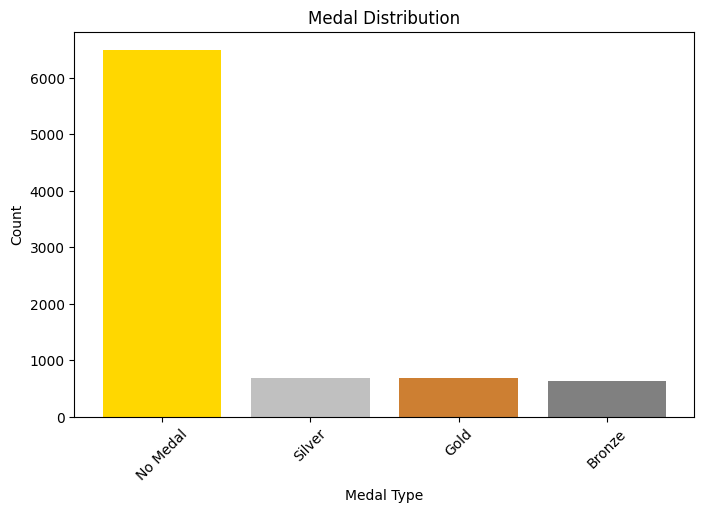

In [14]:
plt.figure(figsize=(8,5))
medal_counts = df['medal'].value_counts()
plt.bar(medal_counts.index, medal_counts.values,
        color=['gold', 'silver', '#cd7f32', 'gray'])
plt.title("Medal Distribution")
plt.xlabel("Medal Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

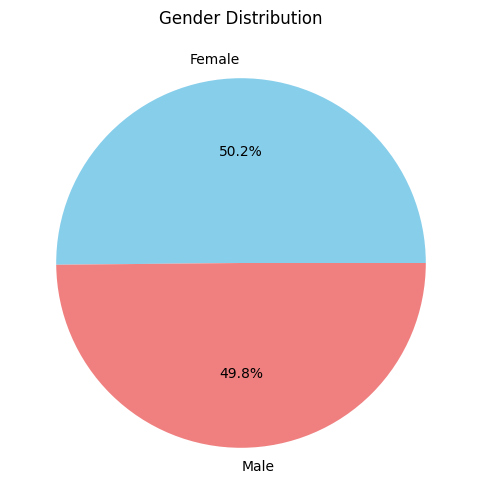

In [15]:
plt.figure(figsize=(6,6))
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts.values,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        colors=['skyblue', 'lightcoral'])
plt.title("Gender Distribution")
plt.show()


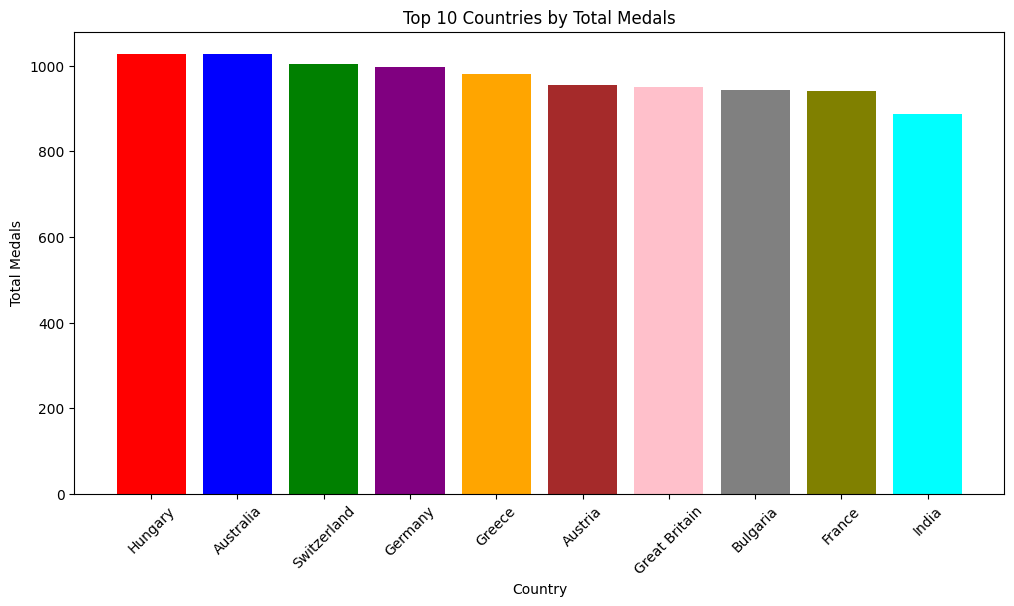

In [16]:
plt.figure(figsize=(12,6))
top_countries = (
    df.groupby('country_name')['total_medals_won']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.bar(top_countries.index,
        top_countries.values,
        color=['red','blue','green','purple',
               'orange','brown','pink','gray',
               'olive','cyan'])

plt.title("Top 10 Countries by Total Medals")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.xticks(rotation=45)
plt.show()

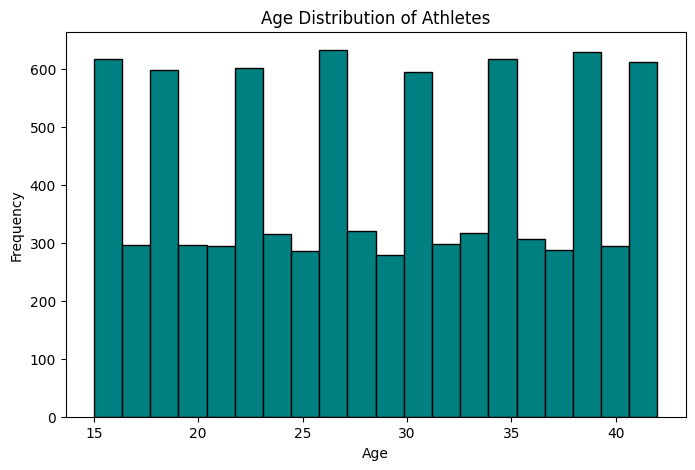

In [17]:
plt.figure(figsize=(8,5))
plt.hist(df['age'].dropna(),
         bins=20,
         color='teal',
         edgecolor='black')

plt.title("Age Distribution of Athletes")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

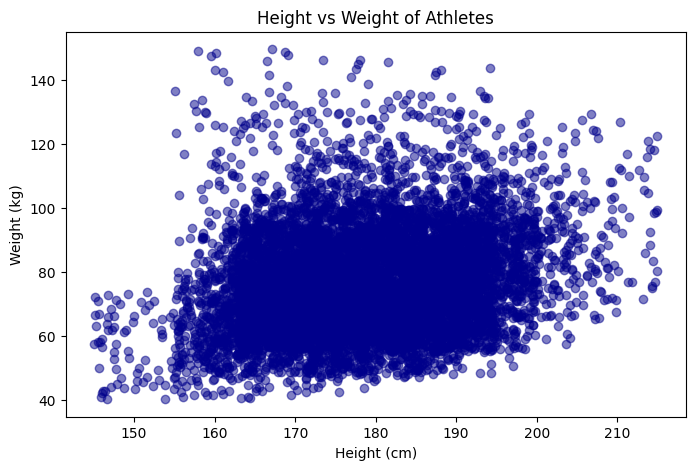

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(df['height_cm'],
            df['weight_kg'],
            color='darkblue',
            alpha=0.5)

plt.title("Height vs Weight of Athletes")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()


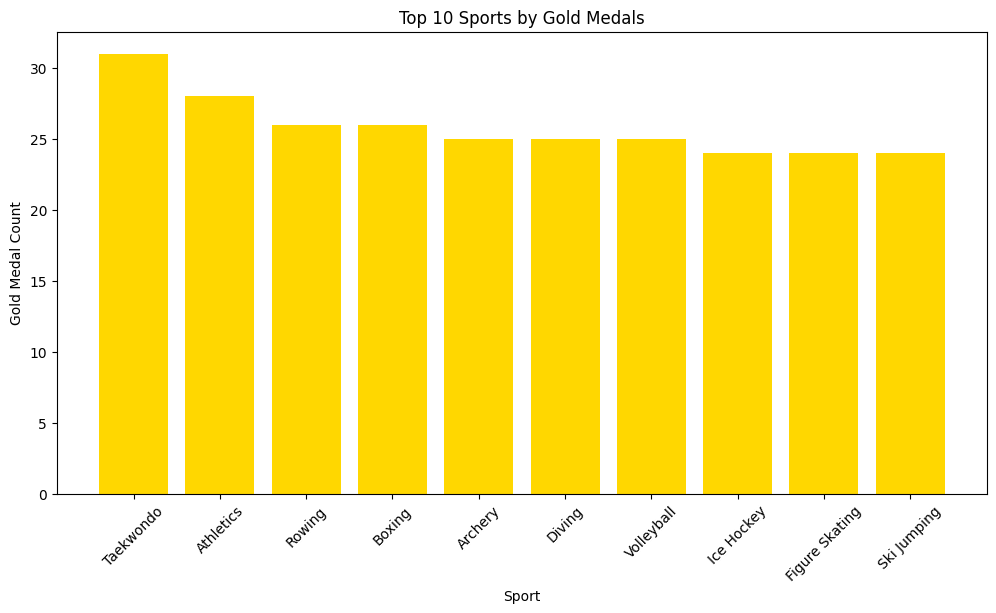

In [19]:
plt.figure(figsize=(12,6))
gold_sport = (
    df[df['medal'] == 'Gold']
    .groupby('sport')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

plt.bar(gold_sport.index,
        gold_sport.values,
        color='gold')

plt.title("Top 10 Sports by Gold Medals")
plt.xlabel("Sport")
plt.ylabel("Gold Medal Count")
plt.xticks(rotation=45)
plt.show()

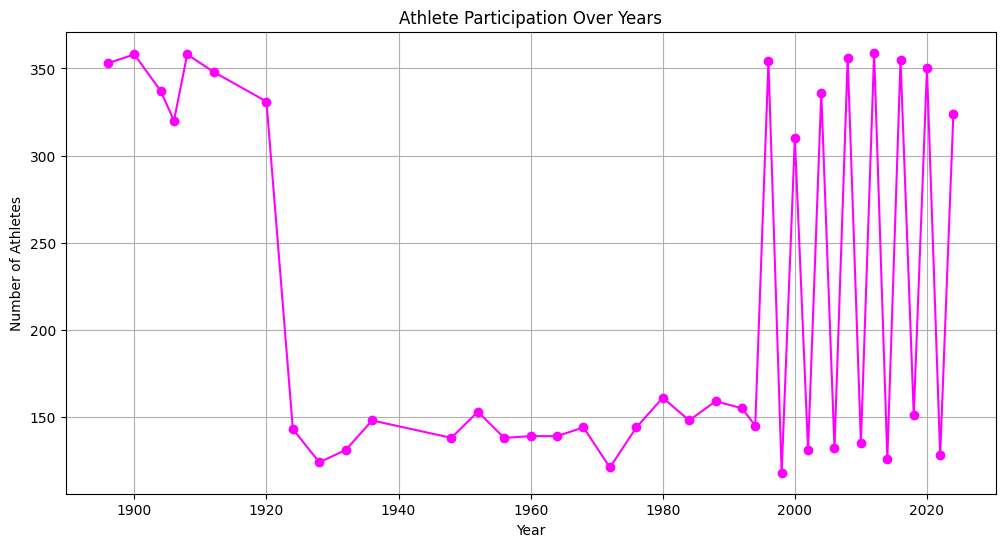

✅ All visualizations generated successfully!


In [20]:
plt.figure(figsize=(12,6))
year_counts = df['year'].value_counts().sort_index()

plt.plot(year_counts.index,
         year_counts.values,
         color='magenta',
         marker='o')

plt.title("Athlete Participation Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.grid(True)
plt.show()

print("✅ All visualizations generated successfully!")

## ML

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [22]:
df['is_gold'] = (df['medal'] == 'Gold').astype(int)

print("Target Distribution:")
print(df['is_gold'].value_counts())

# Ensure at least 2 classes exist
if df['is_gold'].nunique() < 2:
    raise ValueError("Dataset contains only one class. Cannot train model.")

Target Distribution:
is_gold
0    7821
1     679
Name: count, dtype: int64


In [23]:
drop_cols = [
    'medal',
    'total_medals_won',
    'gold_medals',
    'silver_medals',
    'bronze_medals',
    'athlete_id',
    'athlete_name',
    'date_of_birth',
    'coach_name',
    'notes'
]

df = df.drop(columns=drop_cols, errors='ignore')

In [24]:
numeric_cols_fill = ['age', 'height_cm', 'weight_kg']

for col in numeric_cols_fill:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

df = df.fillna("Unknown")

In [25]:
X = df.drop(columns=['is_gold'])
y = df['is_gold']

# Train-Test Split FIRST (No leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [26]:
categorical_cols = X_train.select_dtypes(include='object').columns
numerical_cols = X_train.select_dtypes(exclude='object').columns


In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


In [28]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True)
}

results = {}

plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

Logistic Regression Accuracy: 92.00%
Random Forest Accuracy: 92.00%
SVM Accuracy: 92.00%


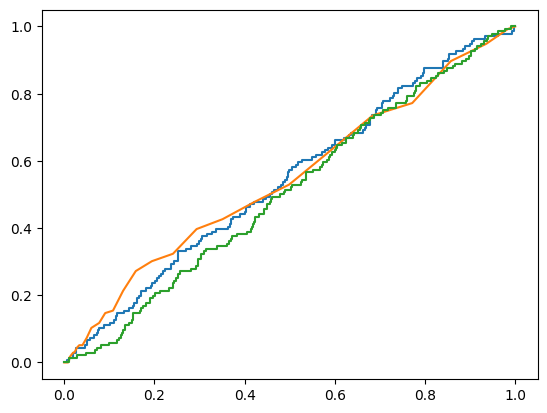

In [29]:
for name, model in models.items():
    
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    
    # Train
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:,1]
    
    # Accuracy %
    accuracy = accuracy_score(y_test, y_pred) * 100
    results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.2f}%")
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")


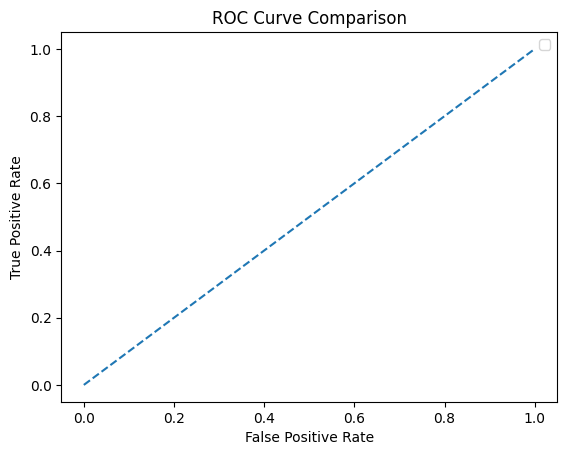

In [30]:
plt.plot([0,1],[0,1],'--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [31]:
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy (%)'])
results_df = results_df.sort_values(by='Accuracy (%)', ascending=False)

print("\nModel Comparison:")
print(results_df)


Model Comparison:
                 Model  Accuracy (%)
0  Logistic Regression          92.0
1        Random Forest          92.0
2                  SVM          92.0


## Thank you...pls upvote!!!